In [1]:
import torch
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from CNNvsDNN.models.model_dense import DenseNet
from CNNvsDNN.models.model_conv import ConvNet

In [2]:
transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
])

In [3]:
test_dataset = datasets.MNIST(root='CNNvsDNN/data/MNIST', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=10, shuffle=True)

In [4]:
def show_mnist_samples(dataset, num_samples=10):
    plt.figure(figsize=(15, 2))
    for i in range(num_samples):
        index = torch.randint(len(dataset), size=(1,)).item()
        image, label = dataset[index]
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(image.squeeze(), cmap='gray')
        plt.title(f"Label: {label}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

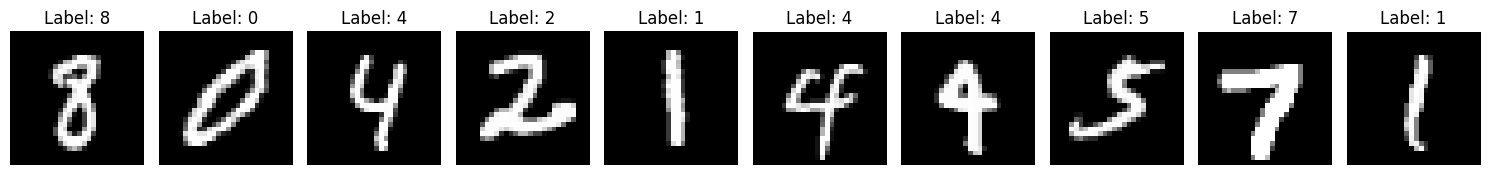

In [5]:
show_mnist_samples(test_dataset, num_samples=10)

Dense Model

In [6]:
model = DenseNet()
model.load_state_dict(torch.load('CNNvsDNN/wts/dense_model.pth', weights_only=True))  

<All keys matched successfully>

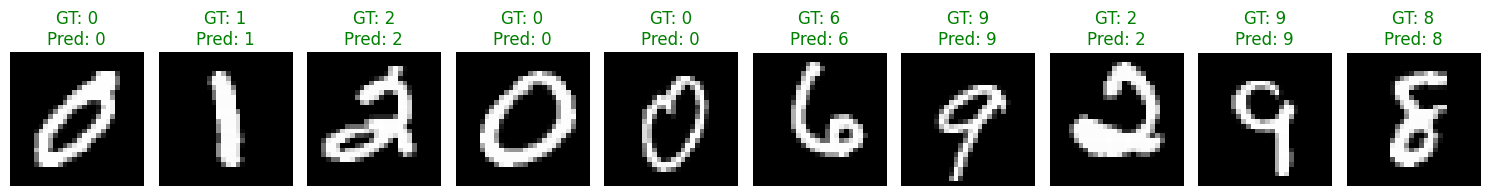

In [7]:
# Get a batch of test data
images, labels = next(iter(test_loader))

# Get model predictions
with torch.no_grad():
    outputs = model(images)
    _, preds = torch.max(outputs, 1)

# Plotting with annotations
plt.figure(figsize=(15, 2))
for i in range(len(images)):
    image = images[i].cpu().squeeze()
    label = labels[i].item()
    pred = preds[i].item()
    color = 'green' if pred == label else 'red'

    plt.subplot(1, len(images), i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"GT: {label}\nPred: {pred}", color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [8]:
# Reporting accuracy on the full test set
correct = 0
total = 0   
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (preds == labels).sum().item()
accuracy = correct / total
print(f"Model accuracy on the test set: {accuracy * 100:.2f}")


Model accuracy on the test set: 97.79


Conv Model

In [9]:
model = ConvNet()
model.load_state_dict(torch.load('CNNvsDNN/wts/conv_model.pth', weights_only=True))  

<All keys matched successfully>

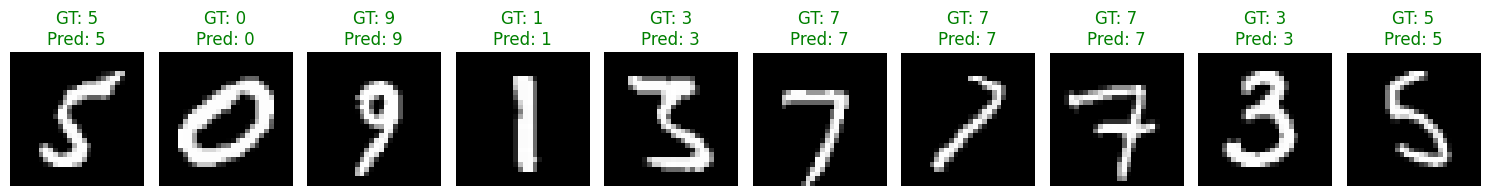

In [10]:
# Get a batch of test data
images, labels = next(iter(test_loader))

# Get model predictions
with torch.no_grad():
    outputs = model(images)
    _, preds = torch.max(outputs, 1)

# Plotting with annotations
plt.figure(figsize=(15, 2))
for i in range(len(images)):
    image = images[i].cpu().squeeze()
    label = labels[i].item()
    pred = preds[i].item()
    color = 'green' if pred == label else 'red'

    plt.subplot(1, len(images), i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"GT: {label}\nPred: {pred}", color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Reporting accuracy on the full test set
correct = 0
total = 0   
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (preds == labels).sum().item()
accuracy = correct / total
print(f"Model accuracy on the test set: {accuracy * 100:.2f}")

Model accuracy on the test set: 99.10
